# Biking from NYC to Key West

## New York to Key West is 1,440 miles
## First, we need to create the journal entries logging cumulative miles each day
## Since that's a lot of miles, let's create some random numbers

In [5]:
import numpy as np
import pandas as pd
import random

entries = [55]
e = entries[len(entries)-1]

while e < 1441:
    r = random.randrange(40,80)
    entries.append(e + r)
    e = entries[len(entries)-1]

print(entries)

[55, 98, 166, 243, 311, 379, 456, 521, 598, 639, 696, 743, 807, 873, 951, 998, 1068, 1135, 1179, 1246, 1289, 1346, 1397, 1454]


## Now that we have our cumulative daily journal entries, let's look at daily miles

In [7]:
daily_cum = pd.Series(entries)
print(daily_cum)

0       55
1       98
2      166
3      243
4      311
5      379
6      456
7      521
8      598
9      639
10     696
11     743
12     807
13     873
14     951
15     998
16    1068
17    1135
18    1179
19    1246
20    1289
21    1346
22    1397
23    1454
dtype: int64


In [17]:
entries2 = [entries[0]]
i = 1

while i < len(entries):
    entries2.append(entries[i] - entries[i-1])
    i+= 1

daily_totals = pd.Series(entries2)

print(daily_totals)

0     55
1     43
2     68
3     77
4     68
5     68
6     77
7     65
8     77
9     41
10    57
11    47
12    64
13    66
14    78
15    47
16    70
17    67
18    44
19    67
20    43
21    57
22    51
23    57
dtype: int64


In [25]:
biking_trip = pd.concat([daily_cum, daily_totals],axis=1)

print(biking_trip)

       0   1
0     55  55
1     98  43
2    166  68
3    243  77
4    311  68
5    379  68
6    456  77
7    521  65
8    598  77
9    639  41
10   696  57
11   743  47
12   807  64
13   873  66
14   951  78
15   998  47
16  1068  70
17  1135  67
18  1179  44
19  1246  67
20  1289  43
21  1346  57
22  1397  51
23  1454  57


In [26]:
biking_trip['day'] = pd.Series(range(1,25))

print(biking_trip)

       0   1  day
0     55  55    1
1     98  43    2
2    166  68    3
3    243  77    4
4    311  68    5
5    379  68    6
6    456  77    7
7    521  65    8
8    598  77    9
9    639  41   10
10   696  57   11
11   743  47   12
12   807  64   13
13   873  66   14
14   951  78   15
15   998  47   16
16  1068  70   17
17  1135  67   18
18  1179  44   19
19  1246  67   20
20  1289  43   21
21  1346  57   22
22  1397  51   23
23  1454  57   24


## And finally, let's look at a graph of the daily miles over time, compared to cumulative.

<AxesSubplot:xlabel='day'>

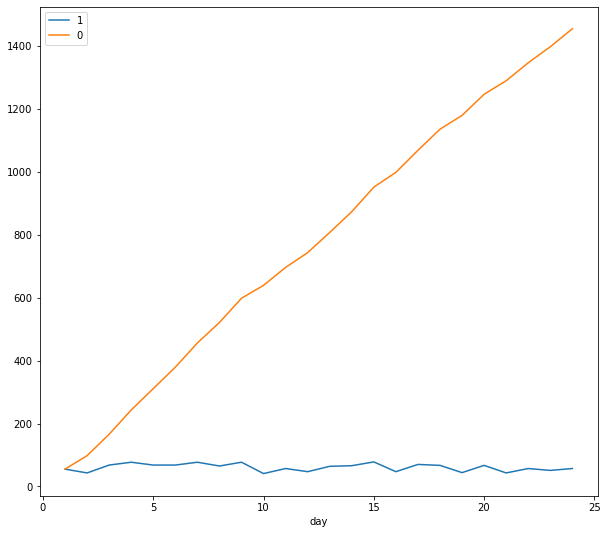

In [29]:
biking_trip.plot(x="day", y=[1,0], kind="line", figsize=(10, 9))